# Importing libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## PCA

In [25]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """
    Displays the correlation graph
    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : our PCA object which has been fit
    x_y : list or tuple : the x,y pair of planes to display, e.g. [0,1] for F1, F2
    features: list or tuple: the list of features (i.e. dimensions) to represent
    """

    # Extract x and y
    x,y=x_y

    
    fig, ax = plt.subplots(figsize=(10, 9))

    # For each component :
    for i in range(0, pca.components_.shape[1]):

        # Arrows
        #ax.arrow(0,0, 
                #pca.components_[x, i],  
                #pca.components_[y, i],  
                #head_width=0.07,
                #head_length=0.07, 
                #width=0.02 )

        # Labels
        plt.text(pca.components_[x, i] - 0.15 ,
                pca.components_[y, i] + 0.1,
                features[i])
        
    # Display of horizontal and vertical lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Name of axes, with percentage of inertia explained
    plt.xlabel('Axis{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('Axis{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("correlation circle (Axis{} and Axis{})".format(x+1, y+1))

    # The circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes and display
    plt.axis('equal')
    plt.show(block=False)

In [30]:
df_pca = pd.read_csv("data_cleaned.csv")
df_pca

,y/delta,y^+,U,dU/dy,W,P,Re_tau,u'u',v'v',w'w',u'v',u'w',v'w',k
0,0.007194,37.306840,14.043179,0.073700,-0.002314,-0.959060,5200,7.103153,0.958211,2.716161,-0.918212,0.000269,0.000138,5.388763
1,0.007452,38.646476,14.139232,0.069773,-0.002330,-0.980840,5200,7.006583,0.979975,2.725204,-0.921877,0.000319,0.000138,5.355881
2,0.007714,40.006557,14.231651,0.066194,-0.002346,-1.001492,5200,6.914939,1.000611,2.732887,-0.925190,0.000367,0.000139,5.324218
3,0.007981,41.387079,14.320739,0.062927,-0.002360,-1.021039,5200,6.828173,1.020141,2.739304,-0.928188,0.000413,0.000139,5.293809
4,0.008251,42.788036,14.406768,0.059940,-0.002373,-1.039507,5200,6.746199,1.038594,2.744540,-0.930902,0.000457,0.000139,5.264666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,0.924453,168.332085,18.229457,0.005679,-0.006407,-0.384075,180,0.671048,0.384075,0.392351,-0.069921,0.001988,-0.000115,0.723737
1463,0.941219,171.385008,18.244917,0.004445,-0.006349,-0.381970,180,0.657393,0.381970,0.387362,-0.054352,0.001856,-0.000092,0.713362
1464,0.958002,174.440956,18.256587,0.003189,-0.006322,-0.380388,180,0.646995,0.380388,0.383672,-0.038806,0.001726,-0.000071,0.705528
1465,0.974796,177.499065,18.264396,0.001917,-0.006324,-0.379334,180,0.640001,0.379334,0.381248,-0.023276,0.001629,-0.000046,0.700291


### Plot the correlation matrix using a heat map to identify the variables that are highly correlated with k (Turbulence Kinetic Energy), P(Pressure) and dU/dy(Velocity) in order to predict the general equation

          y/delta       y^+         U     dU/dy         W         P    Re_tau  \
y/delta  1.000000  0.653625  0.695742 -0.514947 -0.054328  0.967690 -0.096346   
y^+      0.653625  1.000000  0.863473 -0.515469  0.125845  0.548989  0.560501   
U        0.695742  0.863473  1.000000 -0.820737  0.118278  0.556523  0.509919   
dU/dy   -0.514947 -0.515469 -0.820737  1.000000  0.055313 -0.321329 -0.354493   
W       -0.054328  0.125845  0.118278  0.055313  1.000000 -0.067824  0.197062   
P        0.967690  0.548989  0.556523 -0.321329 -0.067824  1.000000 -0.241195   
Re_tau  -0.096346  0.560501  0.509919 -0.354493  0.197062 -0.241195  1.000000   
u'u'    -0.952159 -0.581097 -0.665628  0.533723  0.067949 -0.937452  0.225547   
v'v'    -0.968252 -0.552460 -0.560358  0.323942  0.065931 -0.999980  0.236421   
w'w'    -0.954503 -0.584547 -0.693071  0.549293  0.059870 -0.940637  0.198179   
u'v'     0.999310  0.646798  0.676088 -0.482887 -0.052271  0.974629 -0.111866   
u'w'    -0.336374 -0.140848 

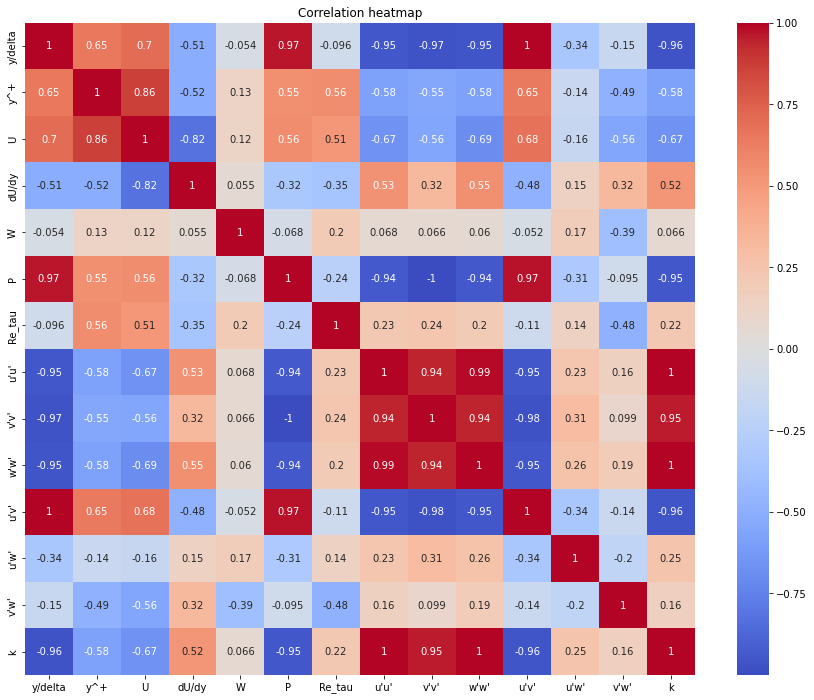

In [46]:
corr = df_pca.corr()
print(corr)
plt.figure(figsize=(15,12 ))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [48]:
pca_va = ["y/delta","u'u'","v'v'","w'w'","u'v'","U"]
df_pca_g = df_pca[pca_va]
df_pca_g

,y/delta,u'u',v'v',w'w',u'v',U
0,0.007194,7.103153,0.958211,2.716161,-0.918212,14.043179
1,0.007452,7.006583,0.979975,2.725204,-0.921877,14.139232
2,0.007714,6.914939,1.000611,2.732887,-0.925190,14.231651
3,0.007981,6.828173,1.020141,2.739304,-0.928188,14.320739
4,0.008251,6.746199,1.038594,2.744540,-0.930902,14.406768
...,...,...,...,...,...,...
1462,0.924453,0.671048,0.384075,0.392351,-0.069921,18.229457
1463,0.941219,0.657393,0.381970,0.387362,-0.054352,18.244917
1464,0.958002,0.646995,0.380388,0.383672,-0.038806,18.256587
1465,0.974796,0.640001,0.379334,0.381248,-0.023276,18.264396


### Standardisation of data because the PCA is sensitive to the scale of the variables
##### After standardising the data, each variable in the dataset will have a mean of 0 and a standard deviation of 1

In [49]:
scaler = StandardScaler()
data_std = scaler.fit_transform(df_pca_g)
df_pca_g = pd.DataFrame(data_std, columns=df_pca_g.columns)
df_pca_g

,y/delta,u'u',v'v',w'w',u'v',U
0,-1.388285,2.751049,0.314268,2.308319,-1.195964,-2.159606
1,-1.387413,2.688956,0.391680,2.322831,-1.208612,-2.131326
2,-1.386528,2.630031,0.465079,2.335161,-1.220050,-2.104116
3,-1.385629,2.574242,0.534547,2.345458,-1.230398,-2.077888
4,-1.384717,2.521534,0.600180,2.353860,-1.239766,-2.052560
...,...,...,...,...,...,...
1462,1.708134,-1.384663,-1.727868,-1.420786,1.732233,-0.927102
1463,1.764732,-1.393443,-1.735357,-1.428792,1.785976,-0.922550
1464,1.821386,-1.400128,-1.740982,-1.434714,1.839639,-0.919114
1465,1.878080,-1.404625,-1.744734,-1.438604,1.893247,-0.916815


### The PCA is applied to the standardised data to generate three principal components

In [50]:
cls = PCA(n_components=3)

pcs = cls.fit_transform(df_pca_g)
cls.components_

array([[-0.42787947,  0.42262479,  0.41559104,  0.42485091, -0.42677208,
        -0.320872  ],
       [ 0.08181574, -0.11225633, -0.32558453, -0.06577283,  0.11989563,
        -0.92520181],
       [ 0.36244555,  0.58068813, -0.29039139,  0.53093248,  0.39896625,
         0.07774321]])

In [51]:
cls.explained_variance_ratio_
inertie = (cls.explained_variance_ratio_*100).round(2)
inertie

array([89.12,  8.73,  1.69])

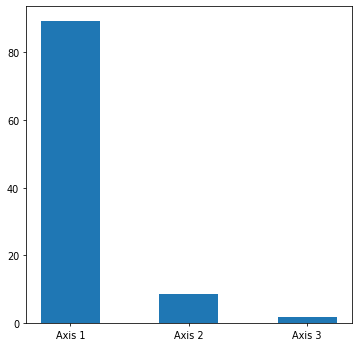

In [52]:
plt.figure(figsize=(6,6), dpi=70)
plt.bar(["Axis 1", "Axis 2", "Axis 3"],cls.explained_variance_ratio_*100,width = 0.5)
plt.show()

The inertia plot shows the percentage of the dataset's variance that is captured by each principal component.
Axis 1: The first principal component captures a significant portion of the variance in the dataset. If this axis has a much higher percentage than the others, it means that this component alone accounts for most of the variability in your data.
Axis 2 and Axis 3: These components capture additional variance but are typically less than the first one. If these are significantly lower, it means that the first component is the dominant pattern in the dataset.

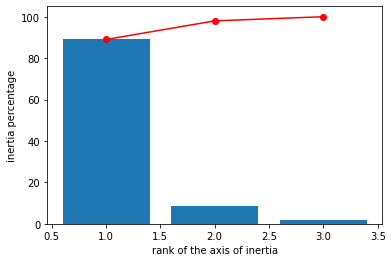

In [53]:
inertie_cum = inertie.cumsum().round()
x_list = range(1, 3+1)
list(x_list)
plt.bar(x_list, inertie)
plt.plot(x_list, inertie_cum,c="red",marker='o')
plt.xlabel("rank of the axis of inertia")
plt.ylabel("inertia percentage")
plt.show(block=False)

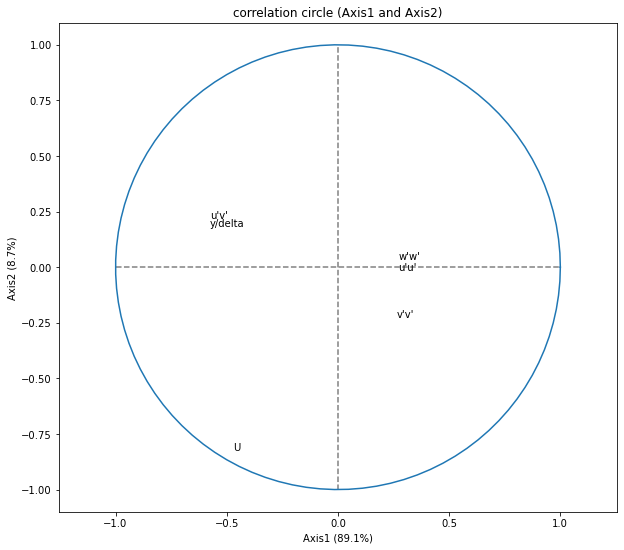

In [54]:
x_y = (0,1)
correlation_graph(cls,x_y,df_pca_g.columns)

The correlation circle shows how the original variables project onto the first two principal components. This can indicate which 
variables are most influential in explaining the variance in those components.

- Variables close to the circumference: Variables that are close to the circle are well represented by the two principal components. If a variable lies close to the circumference, it is well explained by the principal components shown in the circle.
- Variables close to each other: If two variables are close to each other on the circle, they are positively correlated. If they are on opposite ends of the origin, they are negatively correlated.
- Variables close to the axes: If a variable is close to either Axis 1 or Axis 2, it means that this variable is primarily correlated with that principal component.
- Angle between variable vectors: The smaller the angle between two variable vectors, the stronger their positive correlation. A 90-degree angle suggests no correlation, and a 180-degree angle means a strong negative correlation.



In [55]:
pcs

array([[ 4.07133949,  1.17812848,  1.58358076],
       [ 4.07938558,  1.13133073,  1.5302174 ],
       [ 4.08599598,  1.08676362,  1.4791052 ],
       ...,
       [-3.19432721,  2.03832404,  0.25344442],
       [-3.24731415,  2.04924484,  0.29197214],
       [-3.29736504,  2.06023266,  0.33220344]])

In [56]:
df_PCA = pd.DataFrame(data = pcs,columns=['PC1', 'PC2', 'PC3'])
df_PCA

,PC1,PC2,PC3
0,4.071339,1.178128,1.583581
1,4.079386,1.131331,1.530217
2,4.085996,1.086764,1.479105
3,4.091279,1.044297,1.430240
4,4.095330,1.003810,1.383597
...,...,...,...
1462,-3.079565,2.016649,0.181491
1463,-3.138403,2.027462,0.216626
1464,-3.194327,2.038324,0.253444
1465,-3.247314,2.049245,0.291972


### Data visualisation

In [58]:
df_PCA["k"] = df_pca["k"]
df_PCA["dU/dy"] = df_pca["dU/dy"]
df_PCA["P"] = df_pca["P"]
df_PCA

,PC1,PC2,PC3,k,dU/dy,P
0,4.071339,1.178128,1.583581,5.388763,0.073700,-0.959060
1,4.079386,1.131331,1.530217,5.355881,0.069773,-0.980840
2,4.085996,1.086764,1.479105,5.324218,0.066194,-1.001492
3,4.091279,1.044297,1.430240,5.293809,0.062927,-1.021039
4,4.095330,1.003810,1.383597,5.264666,0.059940,-1.039507
...,...,...,...,...,...,...
1462,-3.079565,2.016649,0.181491,0.723737,0.005679,-0.384075
1463,-3.138403,2.027462,0.216626,0.713362,0.004445,-0.381970
1464,-3.194327,2.038324,0.253444,0.705528,0.003189,-0.380388
1465,-3.247314,2.049245,0.291972,0.700291,0.001917,-0.379334


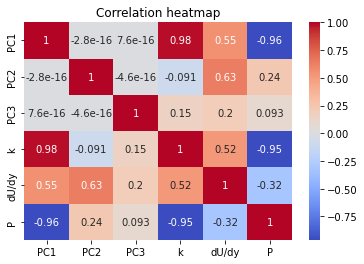

In [59]:
corr = df_PCA.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

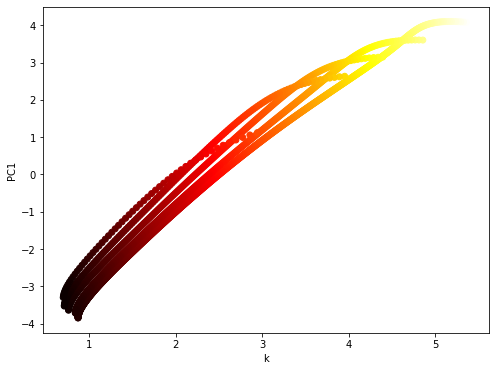

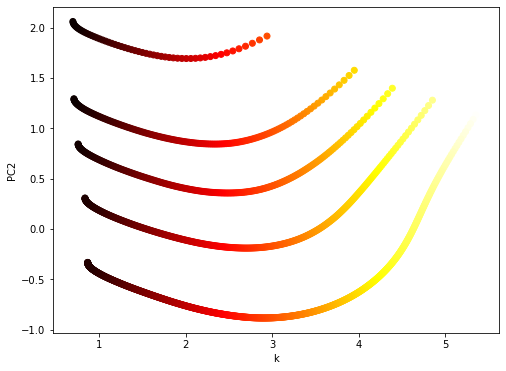

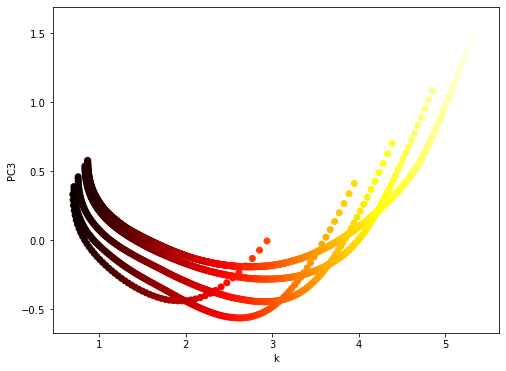

In [60]:
for i in range(1,4):
    plt.figure(figsize=(8, 6))  
    plt.scatter(df_PCA['k'], df_PCA[f"PC{i}"], c = df_PCA["k"])  
    plt.xlabel('k')
    plt.ylabel(f"PC{i}")
    plt.show()

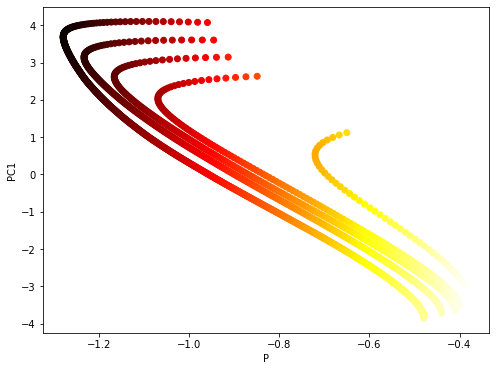

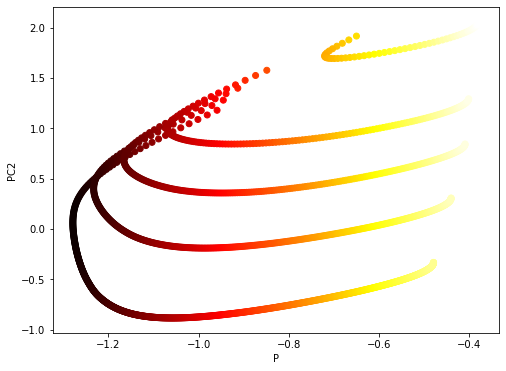

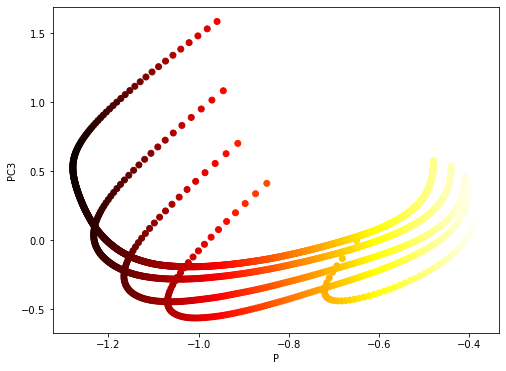

In [61]:
for i in range(1,4):
    plt.figure(figsize=(8, 6))  
    plt.scatter(df_PCA['P'], df_PCA[f"PC{i}"], c = df_PCA["P"])  
    plt.xlabel('P')
    plt.ylabel(f"PC{i}")
    plt.show()

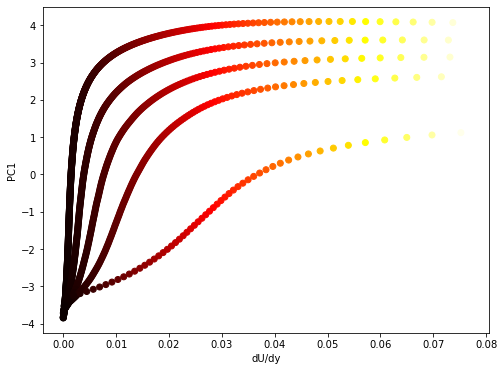

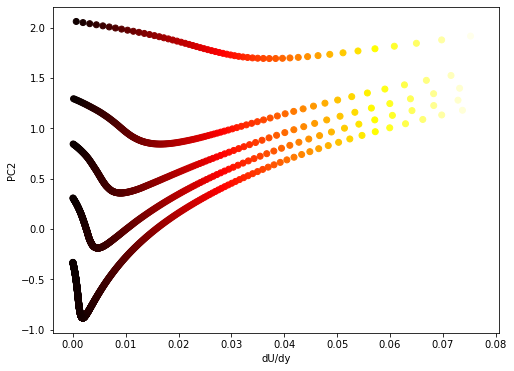

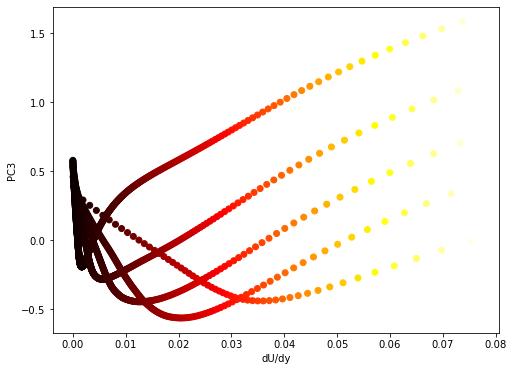

In [62]:
for i in range(1,4):
    plt.figure(figsize=(8, 6))  
    plt.scatter(df_PCA['dU/dy'], df_PCA[f"PC{i}"], c = df_PCA["dU/dy"])  
    plt.xlabel('dU/dy')
    plt.ylabel(f"PC{i}")
    plt.show()

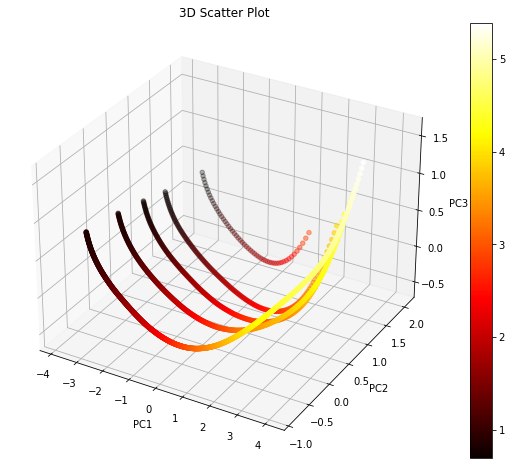

In [65]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(df_PCA['PC1'],df_PCA['PC2'],df_PCA['PC3'],c=df_PCA["k"],cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot')
plt.show()

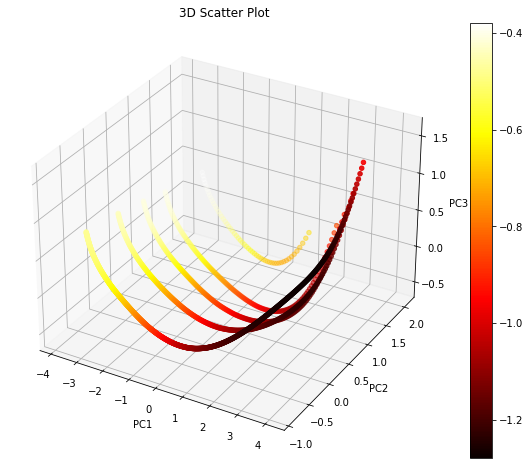

In [63]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(df_PCA['PC1'],df_PCA['PC2'],df_PCA['PC3'],c=df_PCA["P"],cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot')
plt.show()

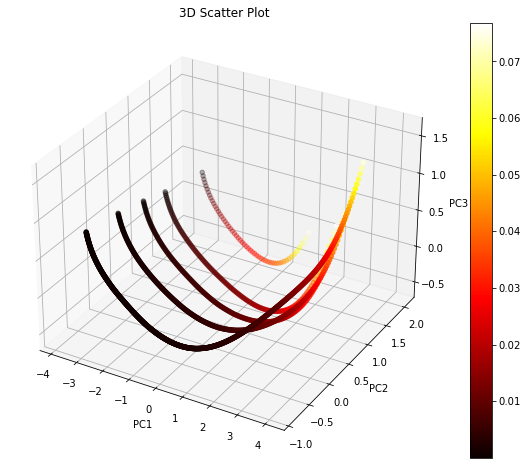

In [64]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(df_PCA['PC1'],df_PCA['PC2'],df_PCA['PC3'],c=df_PCA["dU/dy"],cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot')
plt.show()

In [66]:
df_PCA.to_csv("data_PCA_gen.csv", index=False)